**LGBM & XGBM**

importing required libariers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

Loading the both data sets of train and test datasets.

In [ ]:
data = pd.concat([train_df, test_df], sort=False)

combines the training and test datasets into a single dataset named "data" using the pd.concat() function, with sorting disabled to preserve the original order of columns.

**Data Preprocessing:**

In [ ]:
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       0.0       3    1  22.0      1      0   7.2500         2
1       1.0       1    0  38.0      1      0  71.2833         0
2       1.0       3    0  26.0      0      0   7.9250         2
3       1.0       1    0  35.0      1      0  53.1000         2
4       0.0       3    1  35.0      0      0   8.0500         2

Displays the first five rows of the data set.

In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


prints the number of missing values in each column of the dataset, providing an overview of data completeness and identifying columns that may require data cleaning or imputation.

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)

fills missing values in the dataset: it replaces missing 'Age' and 'Fare' entries with their respective median values, fills missing 'Embarked' entries with the most common mode, and assigns 'Unknown' to missing 'Cabin' entries, thereby handling data gaps for more complete analysis.

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

removes the 'PassengerId', 'Name', 'Ticket', and 'Cabin' columns from the dataset to reduce unnecessary or irrelevant information for subsequent analysis.

In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

encodes categorical variables 'Sex' and 'Embarked' using label encoding, converting them into numerical formats suitable for machine learning algorithms.

**Building Predictive Models:**

In [ ]:
train = data[:len(train_df)]
test = data[len(train_df):]

splits the combined dataset back into training and testing subsets based on the length of the original training dataset, ensuring that the data remains organized for subsequent analysis or modeling.

In [ ]:
X = train.drop("Survived", axis=1)
y = train["Survived"]


separates the features and target variable from the training dataset, with 'X' containing all columns except 'Survived' and 'y' holding the 'Survived' outcomes, preparing the data for model training.



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

splits the feature set 'X' and target variable 'y' into training and validation subsets, allocating 80% of the data for training and 20% for validation, to facilitate model evaluation and tuning.

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


initializes a Light Gradient Boosting Machine (LGBM) classifier, trains it using the training data, and then makes predictions on the validation data to evaluate its performance.



In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

This initializes a gradient‑boosted decision tree classifier (Extreme Gradient Boosting) with reproducible behavior by setting a random seed. The use_label_encoder=False suppresses a deprecated scikit-learn label encoding warning.

Train the model using your training data (X_train, y_train), fitting decision trees in a sequential boosting manner to minimize log-loss error.
geeksforgeeks.org
intellipaat.com

Predict class labels on a validation set (X_val) using the trained classifier:


In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

 defines a function called evaluate_model that takes the true values (y_true), predicted values (y_pred), and the model name (model_name) as input. It then calculates and prints several common classification evaluation metrics:

* Accuracy: The proportion of correctly classified instances.

* Precision: The ability of the model to correctly identify positive instances out of all instances predicted as positive.

* Recall: The ability of the model to correctly identify positive instances out of all actual positive instances.

* F1-Score: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.

* Confusion Matrix: A table that summarizes the number of true positive, true negative, false positive, and false negative predictions.

* Classification Report: A text report showing the main classification metrics (precision, recall, f1-score, support) for each class.

* This function is useful for quickly assessing the performance of a classification model.

In [ ]:
# Evaluate both models
evaluate_model(y_val, lgb_preds, "LightGBM")
evaluate_model(y_val, xgb_preds, "XGBoost")



LightGBM Evaluation
Accuracy: 0.8212290502793296
Precision: 0.7837837837837838
Recall: 0.7837837837837838
F1-Score: 0.7837837837837838
Confusion Matrix:
 [[89 16]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179


XGBoost Evaluation
Accuracy: 0.7988826815642458
Precision: 0.7567567567567568
Recall: 0.7567567567567568
F1-Score: 0.7567567567567568
Confusion Matrix:
 [[87 18]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       105
         1.0       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weight

 snippet calls the evaluate_model function (defined in the previous code cell) twice:

  * evaluate_model(y_val, lgb_preds, "LightGBM"): This line evaluates the performance of the LightGBM model by comparing the true validation labels (y_val) with the predictions made by the LightGBM model (lgb_preds). It also provides the model name "LightGBM" to be used in the output.

  * evaluate_model(y_val, xgb_preds, "XGBoost"): Similarly, this line evaluates the performance of the XGBoost model by comparing the true validation labels (y_val) with the predictions made by the XGBoost model (xgb_preds). It provides the model name "XGBoost" for the output.

Essentially, these two lines are using the evaluation function to calculate and print the accuracy, precision, recall, F1-score, confusion matrix, and classification report for both the LightGBM and XGBoost models on the validation data.

**Comparative Analysis:**

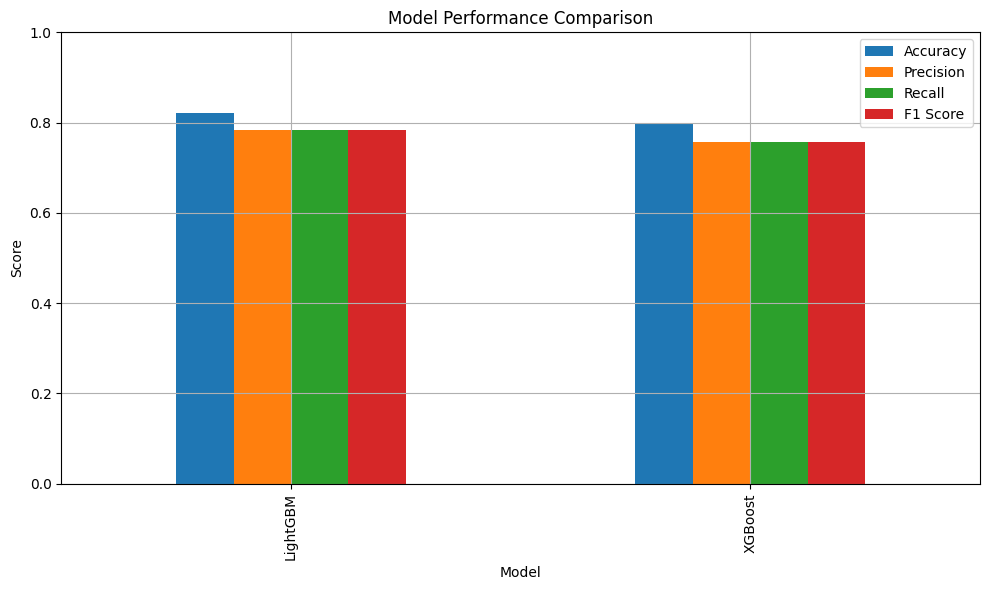

In [ ]:
# Visualization of comparison
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_val, lgb_preds), accuracy_score(y_val, xgb_preds)],
    "Precision": [precision_score(y_val, lgb_preds), precision_score(y_val, xgb_preds)],
    "Recall": [recall_score(y_val, lgb_preds), recall_score(y_val, xgb_preds)],
    "F1 Score": [f1_score(y_val, lgb_preds), f1_score(y_val, xgb_preds)]
}

results_df = pd.DataFrame(results)
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6), title="Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

Visualizes the performance comparison between the LightGBM and XGBoost models:

1.  A dictionary named results is created to store the evaluation metrics for both models. It contains lists for "Model", "Accuracy", "Precision", "Recall", and "F1 Score", populated with the calculated scores from the previous evaluation steps.

2. This converts the results dictionary into a pandas DataFrame called results_df. This makes it easy to work with the data in a tabular format.

3. This line generates a bar plot using the DataFrame.

       *  Sets the "Model" column as the index of the DataFrame, so the model   names will appear on the x-axis of the plot.
       *  Creates a bar plot.

       *  Sets the size of the plot.

       *  Sets the title of the plot.

       *  Labels the y-axis as "Score".

       *  Sets the y-axis limits from 0 to 1, which is appropriate for scores like accuracy, precision, recall, and F1-score.

       *  Adds a grid to the plot for better readability.

       *  Adjusts the plot to prevent labels from overlapping.

       *  Displays the generated plot.

 This code gathers the evaluation metrics, puts them into a DataFrame, and then creates a bar chart to visually compare the performance of the LightGBM and XGBoost models across different metrics.